#### Import numpy, matplotlib.pyplot 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.metrics import r2_score

In [3]:
a = -2
b= 1
x = np.linspace(0,20,num=100)
y = a * x + b + np.random.normal(0,1,x.shape)

In [4]:
print(x.shape)
print(y.shape)


(100,)
(100,)


In [5]:
def GD(x,y,alpha,max_iter):
    theta0 = 0
    theta1 = 0
    tolerance = 1e-3
    loss_list = []
    thetas_list = []
    hyothesis_list = []
    epochs = 0
    for _ in range(max_iter):
        hypo = theta0 + theta1 * x
        hyothesis_list.append(hypo)
        J = (1/(2*len(x))) * np.sum((hypo - y)**2)
        loss_list.append(J)
        gradient_0 = (1/ len(x)) * np.sum((hypo - y))
        gradient_1 = (1/ len(x)) * np.sum((hypo - y)* x) 
        theta0 -= alpha * gradient_0
        theta1 -= alpha * gradient_1
        thetas_list.append([theta0 , theta1])
        if len(loss_list) > 1 and abs(loss_list[-1] - loss_list[-2]) < tolerance:
            break
        epochs +=1
    return thetas_list , loss_list , hyothesis_list ,hypo, epochs ,gradient_0 , gradient_1 , theta0 , theta1


In [6]:
thetas_list , loss_list , hyothesis_list ,hypo,epochs ,gradient_0 , gradient_1 , theta0 , theta1 = GD(x,y,0.001,1000)

In [7]:
print("All thetas list = " , thetas_list)
print("All Losses = " , loss_list)
print("All hypothesis output = " , hyothesis_list)
print("Optimal Gradient 0 =",gradient_0 , " , Optimal Gradient 1=",gradient_1)
print("Optimal theta 0=",theta0, ", Optimal theta 1=",theta1)
print("epochs = " , epochs)

All thetas list =  [[np.float64(-0.01902951485570882), np.float64(-0.25909935549061225)], [np.float64(-0.03544900664165582), np.float64(-0.48328735742012074)], [np.float64(-0.049610198916521776), np.float64(-0.677268462489701)], [np.float64(-0.061817418948417066), np.float64(-0.845113181287141)], [np.float64(-0.07233398457230607), np.float64(-0.9903435052979384)], [np.float64(-0.0813877303904632), np.float64(-1.1160068222530701)], [np.float64(-0.08917578929325085), np.float64(-1.22473987106041)], [np.float64(-0.09586872964906232), np.float64(-1.3188240785294558)], [np.float64(-0.10161413498982752), np.float64(-1.4002334392304046)], [np.float64(-0.10653970131824247), np.float64(-1.4706759433328354)], [np.float64(-0.1107559170393047), np.float64(-1.5316294218619593)], [np.float64(-0.11435838175935462), np.float64(-1.5843725616498352)], [np.float64(-0.11742981261680573), np.float64(-1.6300117408862766)], [np.float64(-0.12004178025103497), np.float64(-1.6695042484619202)], [np.float64(-0.1

#### Calculate r2 score

In [8]:
R2 = 1 - (np.sum((y - hypo)**2)/np.sum((y - np.mean(y))**2))
print("R2 = " , R2)

R2 =  0.9888332781818248


In [9]:
r2_score(y, hypo)


0.9888332781818248

#### Plot loss vs. epochs

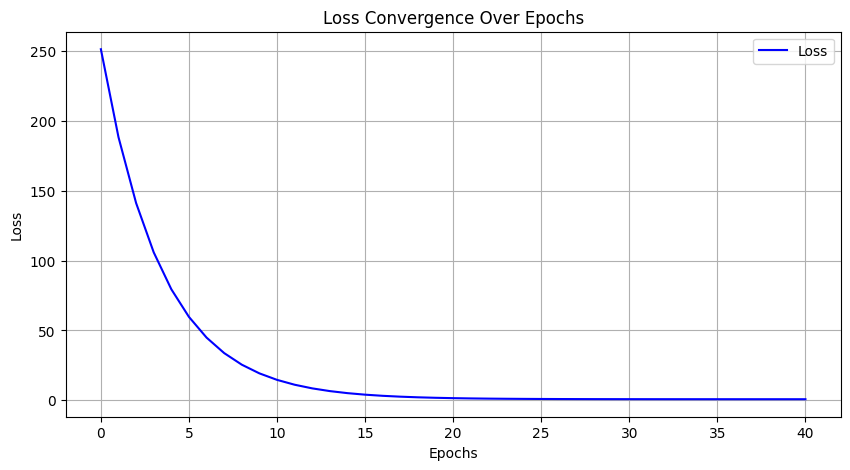

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(loss_list, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

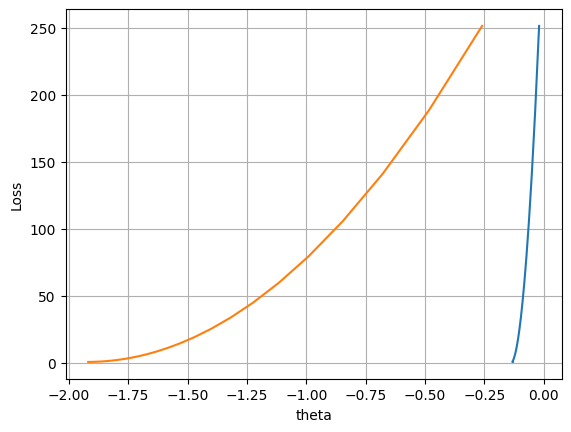

In [11]:
plt.plot(thetas_list, loss_list)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.grid()

#### Plot all regression lines till converge

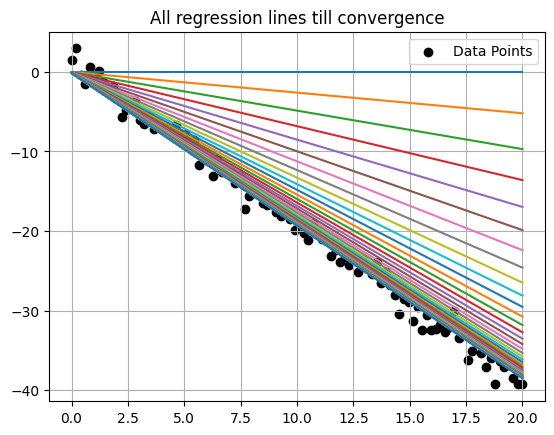

In [12]:
for i in range(len(hyothesis_list)):
    plt.plot(x,hyothesis_list[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

#### Plot the best regression line

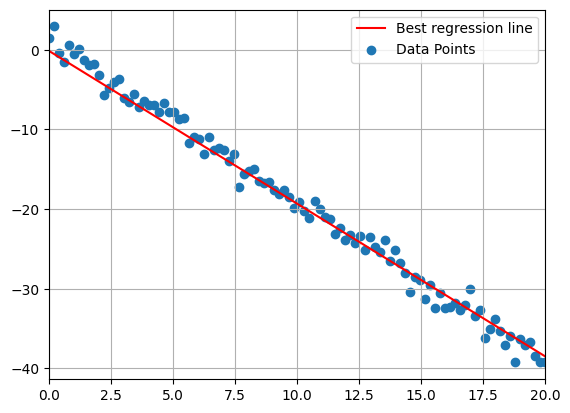

In [13]:
plt.plot(x,hyothesis_list[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.legend()
plt.grid()

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [14]:
thetas_list_new , loss_list_new , hyothesis_list_new , hypo_new , epochs_new ,gradient_0_new , gradient_1_new , theta0_new , theta1_new = GD(x,y,0.01,500)

In [15]:
epochs_new

31

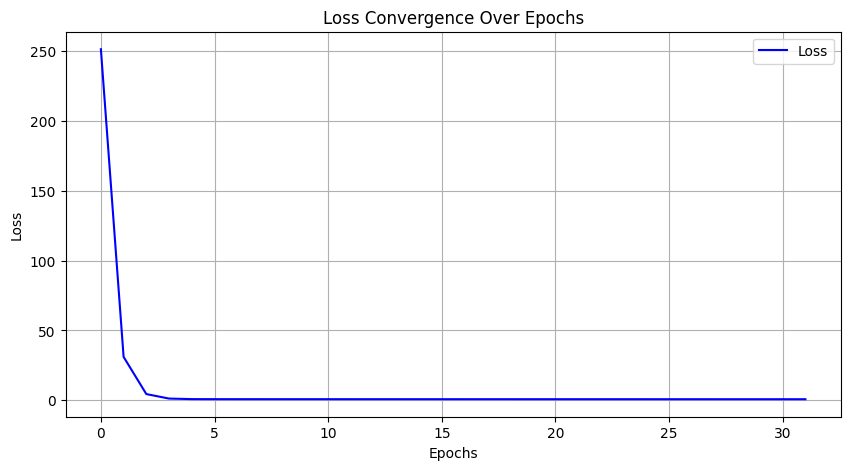

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(loss_list_new, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

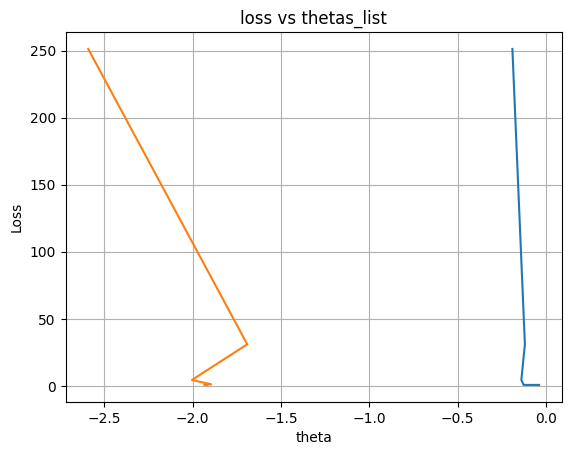

In [17]:
plt.plot(thetas_list_new, loss_list_new)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.title('loss vs thetas_list')
plt.grid()

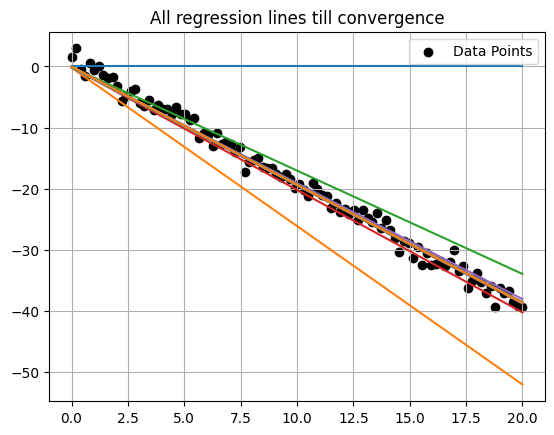

In [18]:
for i in range(len(hyothesis_list_new)):
    plt.plot(x,hyothesis_list_new[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

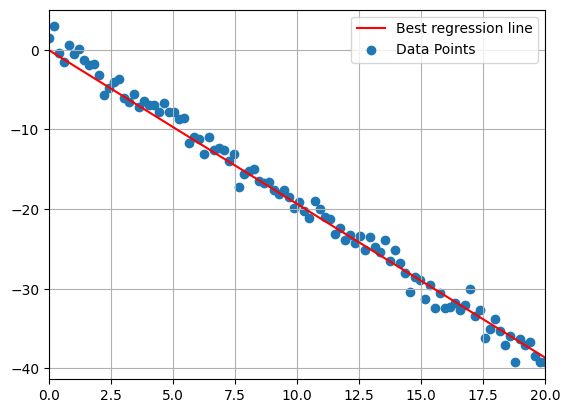

In [19]:
plt.plot(x,hyothesis_list_new[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.legend()
plt.grid()

#### Updating the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Changing the batch size and seeing the effect

### `Mini-Batch`

In [20]:
def GD_mini_batch(x,y,alpha,max_iter,batch_size):
    theta0 = 0
    theta1 = 0
    tolerance = 1e-3
    thetas_list = []
    epochs = 0
    epoch_loss = []
    epoch_hypothesis = []
    m = len(x)
    np.random.seed(88)
    
    #loop for epochs
    for _ in range(max_iter):          
        p = np.random.permutation(m)
        x_shuffled = x[p]
        y_shuffled = y[p]
        
        epochs +=1
        #loop for batches
        for i in range(0,m,batch_size):
            x_batch = x_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            
            hypo = theta0 + theta1 * x_batch
            epoch_hypothesis.append(theta0 + theta1 * x)

            J = (1/(2*len(x_batch))) * np.sum((hypo - y_batch)**2)
            epoch_loss.append(J)

            gradient_0 = (1/ len(x_batch)) * np.sum((hypo - y_batch))
            gradient_1 = (1/ len(x_batch)) * np.sum((hypo - y_batch)* x_batch) 
            theta0 -= alpha * gradient_0
            theta1 -= alpha * gradient_1
            thetas_list.append([theta0 , theta1])
        

        if len(epoch_loss) > 1 and abs(epoch_loss[-1] - epoch_loss[-2]) < tolerance:
            break
        
        
    return thetas_list  ,epoch_loss , epoch_hypothesis , epochs , theta0 , theta1

In [21]:
thetas_list  ,epoch_loss , epoch_hypothesis , epochs , theta0 , theta1 = GD_mini_batch(x,y,0.001,1000,10)

In [22]:
R2 = 1 - (np.sum((y - epoch_hypothesis[-1])**2)/np.sum((y - np.mean(y))**2))
print("R2 = " , R2)

R2 =  0.9919427184153489


In [23]:
r2_score(y,epoch_hypothesis[-1])

0.9919427184153489

In [24]:
epochs

676

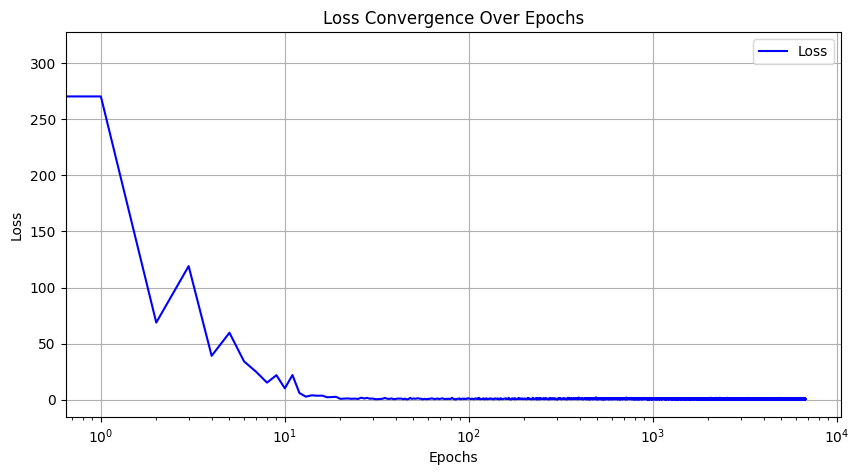

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_loss, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xscale('log')
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

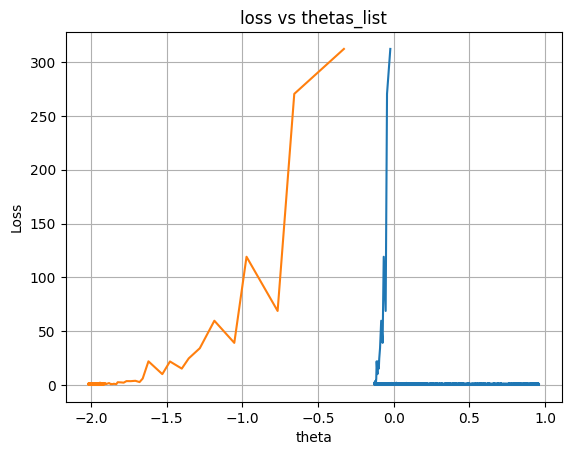

In [26]:
plt.plot(thetas_list, epoch_loss)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.title('loss vs thetas_list')
plt.grid()

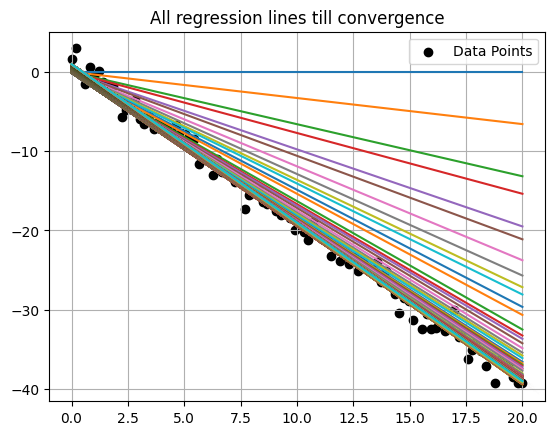

In [27]:
for i in range(len(epoch_hypothesis)):
    plt.plot(x,epoch_hypothesis[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

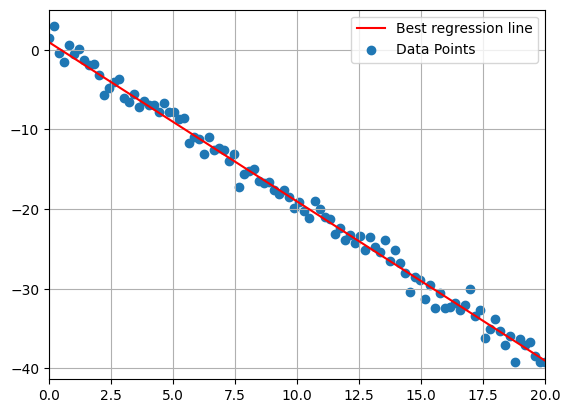

In [28]:
plt.plot(x,epoch_hypothesis[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.legend()
plt.grid()

## Stochastic GD

In [29]:
def stochastic_GD(x,y,alpha,max_iter):
    theta0 = 0
    theta1 = 0
    tolerance = 1e-3
    thetas_list = []
    epochs = 0
    epoch_loss = []
    all_losses = []
    epoch_hypothesis = []
    m = len(x)
    np.random.seed(88)
    hypo = 0 

    #loop for epochs
    for _ in range(max_iter):          
        
        epochs +=1
        
        #loop for samples
        for i in range(0,m):
            X = x[i]
            Y = y[i]
            
            hypo = theta0 + theta1 * X
            epoch_hypothesis.append(theta0 + theta1 * x)

            J = (hypo - Y)**2
            epoch_loss.append(J)

            gradient_0 = (hypo - Y)
            gradient_1 = (hypo - Y)* X 
            theta0 -= alpha * gradient_0
            theta1 -= alpha * gradient_1
            thetas_list.append([theta0 , theta1])

        #epoch_hypothesis.append(hypo)
        all_losses.append(epoch_loss[-1])
        if len(all_losses) > 1 and abs(all_losses[-1] - all_losses[-2]) < tolerance:
            break
        
        
    return thetas_list  ,all_losses, epoch_loss , epoch_hypothesis , epochs , theta0 , theta1

In [30]:
thetas_list  ,all_losses, epoch_loss , epoch_hypothesis , epochs , theta0 , theta1 = stochastic_GD(x,y,0.001,1000)

In [31]:
R2 = 1 - (np.sum((y - epoch_hypothesis[-1])**2)/np.sum((y - np.mean(y))**2))
print("R2 = " , R2)

R2 =  0.9872890219854793


In [32]:
r2_score(y,epoch_hypothesis[-1])

0.9872890219854793

In [33]:
epochs

2

C:\Users\PCCV\AppData\Local\Temp\ipykernel_20980\1403121793.py:6: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0,500)


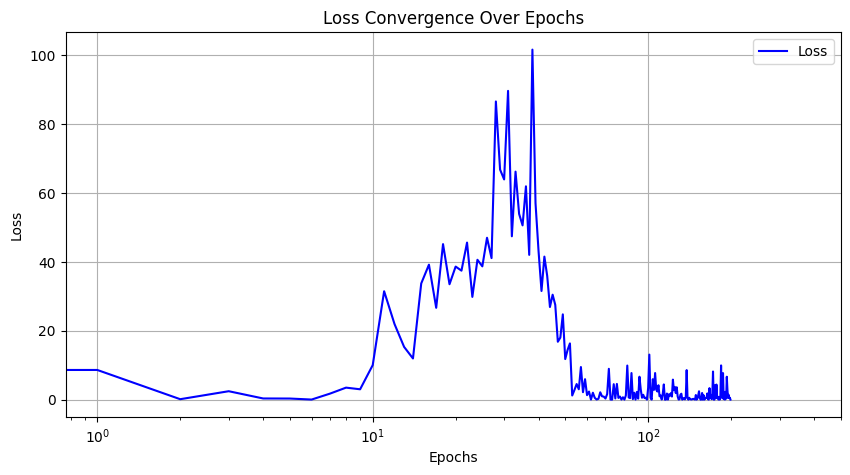

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(epoch_loss, linestyle='-', color='b', label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xscale('log')
plt.xlim(0,500)
plt.title("Loss Convergence Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

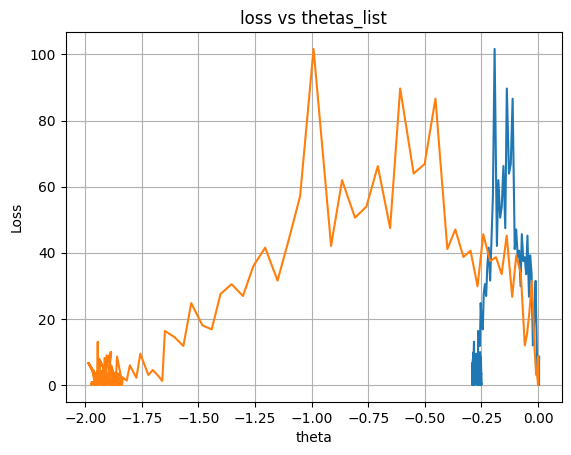

In [35]:
plt.plot(thetas_list, epoch_loss)
plt.xlabel("theta")
plt.ylabel("Loss")
plt.title('loss vs thetas_list')
plt.grid()

In [36]:
epoch_hypothesis

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495,
        0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495,
        0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495,
        0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495,
        0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495,
        0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495,
        0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495, 0.0015495,
        0.0015495, 0.0015495, 0.

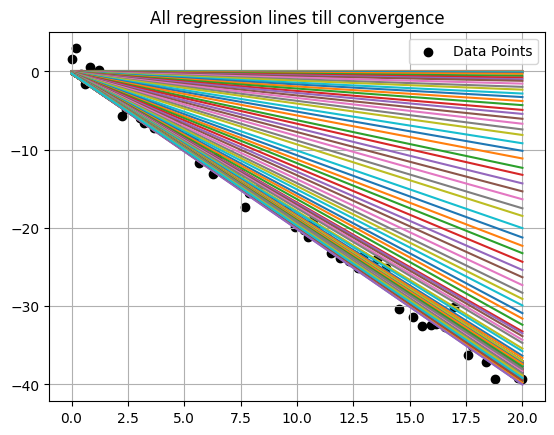

In [37]:
for i in range(len(epoch_hypothesis)):
    plt.plot(x,epoch_hypothesis[i])
plt.scatter(x,y , c='black',label='Data Points')
plt.title("All regression lines till convergence")
plt.legend()
plt.grid()

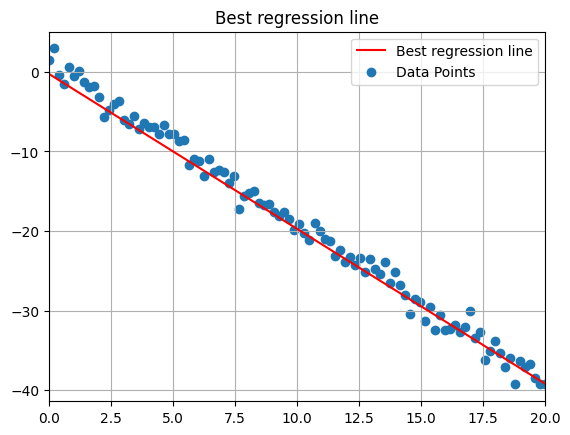

In [38]:
plt.plot(x,epoch_hypothesis[-1] , c='r' , label = 'Best regression line')
plt.scatter(x,y , label='Data Points')
plt.xlim(0,20)
plt.title('Best regression line')
plt.legend()
plt.grid()

## After trying the `Batch` , `Mini-batch` and `Stochastic` Gradient Descent and calculating their score and plotting them in graphs : 




## The `Mini-batch gradient descent` is the most accurate one with the highest score 